# Outlier Detection: Bayelsa State Election Data Using Geospatial Analysis

### Dataset preparation by loading necessary libraries

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from geopy.geocoders import GoogleV3
from geopy.exc import GeocoderTimedOut
import time

In [4]:
# The downloaded dataset was transform from the original to the neibouring units

df1 = pd.read_csv(r'C:\Users\PC\Documents\ENV_LAB\HNG Intenship\Data\BAYELSA_crosschecked.csv') # original dataset

df1.head()

,State,LGA,Ward,PU-Code,PU-Name,Accredited_Voters,Registered_Voters,Results_Found,Transcription_Count,Result_Sheet_Stamped,Result_Sheet_Corrected,Result_Sheet_Invalid,Result_Sheet_Unclear,Result_Sheet_Unsigned,APC,LP,PDP,NNPP,Results_File
0,BAYELSA,BRASS,SHIRA,06-01-01-003,YANA WEST PRIMARY SCHOOL II,240,385,True,-1,False,False,False,False,UNKNOWN,30,83,52,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
1,BAYELSA,BRASS,SHIRA,06-01-01-005,YANA WEST PRIMARY SCHOOL II,240,385,True,-1,False,True,False,False,UNKNOWN,32,40,48,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
2,BAYELSA,BRASS,BRASS 1,06-01-01-007,IGBODO 1 OPEN SPACE,84,374,True,-1,False,True,False,False,UNKNOWN,17,21,43,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
3,BAYELSA,BRASS,BRASS 1,06-01-01-008,AGIP SITE OPEN SPACE,58,433,True,-1,False,False,False,False,UNKNOWN,3,39,13,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....
4,BAYELSA,BRASS,BRASS 1,06-01-01-009,AGIP SITE OPEN SPACE,58,433,True,-1,False,False,False,False,UNKNOWN,1,2,4,0,https://inec-cvr-cache.s3.eu-west-1.amazonaws....


After select some valuable features from the dataset for our analysis 

In [5]:
# The dataset was now added with latitude and longitude by using geopy.geocoders import GoogleV3
df2 = pd.read_csv('bayelsa_polling_stations.csv')

df2.head()

,PU-Code,PU-Name,Ward,Address,Latitude,Longitude,APC,LP,PDP,NNPP
0,06-01-01-003,YANA WEST PRIMARY SCHOOL II,SHIRA,"BRASS , BAYELSA",4.307773,6.24556,30,83,52,0
1,06-01-01-005,YANA WEST PRIMARY SCHOOL II,SHIRA,"BRASS , BAYELSA",4.307773,6.24556,32,40,48,0
2,06-01-01-007,IGBODO 1 OPEN SPACE,BRASS 1,"BRASS , BAYELSA",4.307773,6.24556,17,21,43,0
3,06-01-01-008,AGIP SITE OPEN SPACE,BRASS 1,"BRASS , BAYELSA",4.307773,6.24556,3,39,13,0
4,06-01-01-009,AGIP SITE OPEN SPACE,BRASS 1,"BRASS , BAYELSA",4.307773,6.24556,1,2,4,0


In [7]:
df2.columns

Index(['PU-Code', 'PU-Name', 'Ward', 'Address', 'Latitude', 'Longitude', 'APC',
       'LP', 'PDP', 'NNPP'],
      dtype='object')

In [8]:
df2.shape

(1928, 10)

In [9]:
# check for percentages of null values in each columns
(df2.isnull().sum()/len(df2)*100)

PU-Code      0.0
PU-Name      0.0
Ward         0.0
Address      0.0
Latitude     0.0
Longitude    0.0
APC          0.0
LP           0.0
PDP          0.0
NNPP         0.0
dtype: float64

Our data is free of any null values(i.e clean dataset)

### Neighbour Identification

In [11]:
# Define a radius for determining neighbors (e.g., 1 km)
radius = 1000  # in meters

# Function to calculate distance between two points
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).meters

# Identify neighbors for each polling unit
neighbors = []

for i, row1 in df2.iterrows():
    neighbor_units = []
    for j, row2 in df2.iterrows():
        if i != j:
            distance = calculate_distance((row1['Latitude'], row1['Longitude']), (row2['Latitude'], row2['Longitude']))
            if distance <= radius:
                neighbor_units.append(row2['PU-Name'])
    neighbors.append(neighbor_units)

# Add neighbors to the DataFrame
#df2['Neighbors'] = neighbors

# Save the updated DataFrame to a new CSV file
#data = df2['Neighbors']
#data.to_csv('bayelsa_polling_stations_with_neighbors1.csv', index=False)

# Print the first few rows of the updated DataFrame
#data.head()

In [12]:
df2['Neighbors']= neighbors

In [13]:
df2

,PU-Code,PU-Name,Ward,Address,Latitude,Longitude,APC,LP,PDP,NNPP,Neighbors
0,06-01-01-003,YANA WEST PRIMARY SCHOOL II,SHIRA,"BRASS , BAYELSA",4.307773,6.245560,30,83,52,0,"[YANA WEST PRIMARY SCHOOL II, IGBODO 1 OPEN SP..."
1,06-01-01-005,YANA WEST PRIMARY SCHOOL II,SHIRA,"BRASS , BAYELSA",4.307773,6.245560,32,40,48,0,"[YANA WEST PRIMARY SCHOOL II, IGBODO 1 OPEN SP..."
2,06-01-01-007,IGBODO 1 OPEN SPACE,BRASS 1,"BRASS , BAYELSA",4.307773,6.245560,17,21,43,0,"[YANA WEST PRIMARY SCHOOL II, YANA WEST PRIMAR..."
3,06-01-01-008,AGIP SITE OPEN SPACE,BRASS 1,"BRASS , BAYELSA",4.307773,6.245560,3,39,13,0,"[YANA WEST PRIMARY SCHOOL II, YANA WEST PRIMAR..."
4,06-01-01-009,AGIP SITE OPEN SPACE,BRASS 1,"BRASS , BAYELSA",4.307773,6.245560,1,2,4,0,"[YANA WEST PRIMARY SCHOOL II, YANA WEST PRIMAR..."
...,...,...,...,...,...,...,...,...,...,...,...
1923,06-05-02-021,STATE SCHOOL (ASSEMBLY GROUND)-OTUOKPOTI,OTUOKPOTI,"OGBIA , BAYELSA",4.690139,6.321278,7,2,5,0,"[MARKET SQUARE OGIA TOWN, APOLOGBO - OGBIA, AK..."
1924,06-05-02-022,OPUKUMO OPEN SPACE-OTUOKPOTI,OTUOKPOTI,"OGBIA , BAYELSA",4.690139,6.321278,23,12,28,0,"[MARKET SQUARE OGIA TOWN, APOLOGBO - OGBIA, AK..."
1925,06-05-02-023,OGUOSUEMI OPEN SPACE,OTUOKPOTI,"OGBIA , BAYELSA",4.690139,6.321278,33,10,27,0,"[MARKET SQUARE OGIA TOWN, APOLOGBO - OGBIA, AK..."
1926,06-05-02-024,"FRONT OF PRINCIPAL OFFICE, STATE SCHOOL-OTUOGORI",OTUOKPOTI,"OGBIA , BAYELSA",4.690139,6.321278,0,0,1,0,"[MARKET SQUARE OGIA TOWN, APOLOGBO - OGBIA, AK..."


In [25]:
df2.to_csv('bayelsa_polling_stations_with_neighbors.csv')

In [26]:
data = pd.read_csv('bayelsa_polling_stations_with_neighbors.csv')
data

,Unnamed: 0,PU-Code,PU-Name,Ward,Address,Latitude,Longitude,APC,LP,PDP,NNPP,Neighbors
0,0,06-01-01-003,YANA WEST PRIMARY SCHOOL II,SHIRA,"BRASS , BAYELSA",4.307773,6.245560,30,83,52,0,"['YANA WEST PRIMARY SCHOOL II', 'IGBODO 1 OPEN..."
1,1,06-01-01-005,YANA WEST PRIMARY SCHOOL II,SHIRA,"BRASS , BAYELSA",4.307773,6.245560,32,40,48,0,"['YANA WEST PRIMARY SCHOOL II', 'IGBODO 1 OPEN..."
2,2,06-01-01-007,IGBODO 1 OPEN SPACE,BRASS 1,"BRASS , BAYELSA",4.307773,6.245560,17,21,43,0,"['YANA WEST PRIMARY SCHOOL II', 'YANA WEST PRI..."
3,3,06-01-01-008,AGIP SITE OPEN SPACE,BRASS 1,"BRASS , BAYELSA",4.307773,6.245560,3,39,13,0,"['YANA WEST PRIMARY SCHOOL II', 'YANA WEST PRI..."
4,4,06-01-01-009,AGIP SITE OPEN SPACE,BRASS 1,"BRASS , BAYELSA",4.307773,6.245560,1,2,4,0,"['YANA WEST PRIMARY SCHOOL II', 'YANA WEST PRI..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1923,1923,06-05-02-021,STATE SCHOOL (ASSEMBLY GROUND)-OTUOKPOTI,OTUOKPOTI,"OGBIA , BAYELSA",4.690139,6.321278,7,2,5,0,"['MARKET SQUARE OGIA TOWN', 'APOLOGBO - OGBIA'..."
1924,1924,06-05-02-022,OPUKUMO OPEN SPACE-OTUOKPOTI,OTUOKPOTI,"OGBIA , BAYELSA",4.690139,6.321278,23,12,28,0,"['MARKET SQUARE OGIA TOWN', 'APOLOGBO - OGBIA'..."
1925,1925,06-05-02-023,OGUOSUEMI OPEN SPACE,OTUOKPOTI,"OGBIA , BAYELSA",4.690139,6.321278,33,10,27,0,"['MARKET SQUARE OGIA TOWN', 'APOLOGBO - OGBIA'..."
1926,1926,06-05-02-024,"FRONT OF PRINCIPAL OFFICE, STATE SCHOOL-OTUOGORI",OTUOKPOTI,"OGBIA , BAYELSA",4.690139,6.321278,0,0,1,0,"['MARKET SQUARE OGIA TOWN', 'APOLOGBO - OGBIA'..."


In [18]:
# Define a function to calculate the mean votes of neighbors
def calculate_mean_votes(neighbors, party, data):
    neighbor_votes = df2[(df2['PU-Name'].isin(neighbors)) & (data['Party'] == party)]['Votes']
    if len(neighbor_votes) > 0:
        return neighbor_votes.mean()
    else:
        return np.nan


In [27]:
import pandas as pd
from geopy.distance import geodesic
import numpy as np

# Load the dataset

data = pd.read_csv('bayelsa_polling_stations_with_neighbors.csv')

# Display the first few rows of the dataframe to understand its structure
#print(data.head())

# Define the radius for neighbours (in kilometers)
radius_km = 1.0

# Initialize the distance matrix
dist_matrix = np.zeros((len(data), len(data)))

# Calculate the distance matrix
for i, row_i in data.iterrows():
    for j, row_j in data.iterrows():
        if i != j:
            dist_matrix[i, j] = geodesic((row_i['Latitude'], row_i['Longitude']), (row_j['Latitude'], row_j['Longitude'])).kilometers

# Create a list to store the outlier scores and neighbour information
results = []

# Iterate over each polling unit to calculate the outlier scores
for index, row in data.iterrows():
    # Find neighbouring polling units within the specified radius
    neighbours = data[(dist_matrix[index] <= radius_km) & (data.index != index)]

    # Calculate the outlier score for each party
    apc_outlier = abs(row['APC'] - neighbours['APC'].mean()) if not neighbours.empty else 0
    lp_outlier = abs(row['LP'] - neighbours['LP'].mean()) if not neighbours.empty else 0
    pdp_outlier = abs(row['PDP'] - neighbours['PDP'].mean()) if not neighbours.empty else 0
    nnpp_outlier = abs(row['NNPP'] - neighbours['NNPP'].mean()) if not neighbours.empty else 0

    # Store the results
    results.append({
        'PU-Name': row['PU-Name'],
        'Latitude': row['Latitude'],
        'Longitude': row['Longitude'],
        'APC_outlier': apc_outlier,
        'LP_outlier': lp_outlier,
        'PDP_outlier': pdp_outlier,
        'NNPP_outlier': nnpp_outlier,
        'Neighbour_polls': neighbours['PU-Name'].tolist()
    })

# Convert the results list to a DataFrame
outlier_scores = pd.DataFrame(results)

# Save the outlier scores DataFrame to a new CSV file
#output_file_path = '/mnt/data/bayelsa_polling_stations_outlier_scores.csv'
#outlier_scores.to_csv(output_file_path, index=False)

# Display the outlier scores
#print(outlier_scores.head())


In [28]:
outlier_scores.head()

,PU-Name,Latitude,Longitude,APC_outlier,LP_outlier,PDP_outlier,NNPP_outlier,Neighbour_polls
0,YANA WEST PRIMARY SCHOOL II,4.307773,6.24556,6.566667,68.780000,13.066667,0.206667,"[YANA WEST PRIMARY SCHOOL II, IGBODO 1 OPEN SP..."
1,YANA WEST PRIMARY SCHOOL II,4.307773,6.24556,8.580000,25.493333,9.040000,0.206667,"[YANA WEST PRIMARY SCHOOL II, IGBODO 1 OPEN SP..."
2,IGBODO 1 OPEN SPACE,4.307773,6.24556,6.520000,6.366667,4.006667,0.206667,"[YANA WEST PRIMARY SCHOOL II, YANA WEST PRIMAR..."
3,AGIP SITE OPEN SPACE,4.307773,6.24556,20.613333,24.486667,26.193333,0.206667,"[YANA WEST PRIMARY SCHOOL II, YANA WEST PRIMAR..."
4,AGIP SITE OPEN SPACE,4.307773,6.24556,22.626667,12.760000,35.253333,0.206667,"[YANA WEST PRIMARY SCHOOL II, YANA WEST PRIMAR..."


In [29]:
outlier_scores.to_excel('Bayelsa_polling_outliers.xlsx')

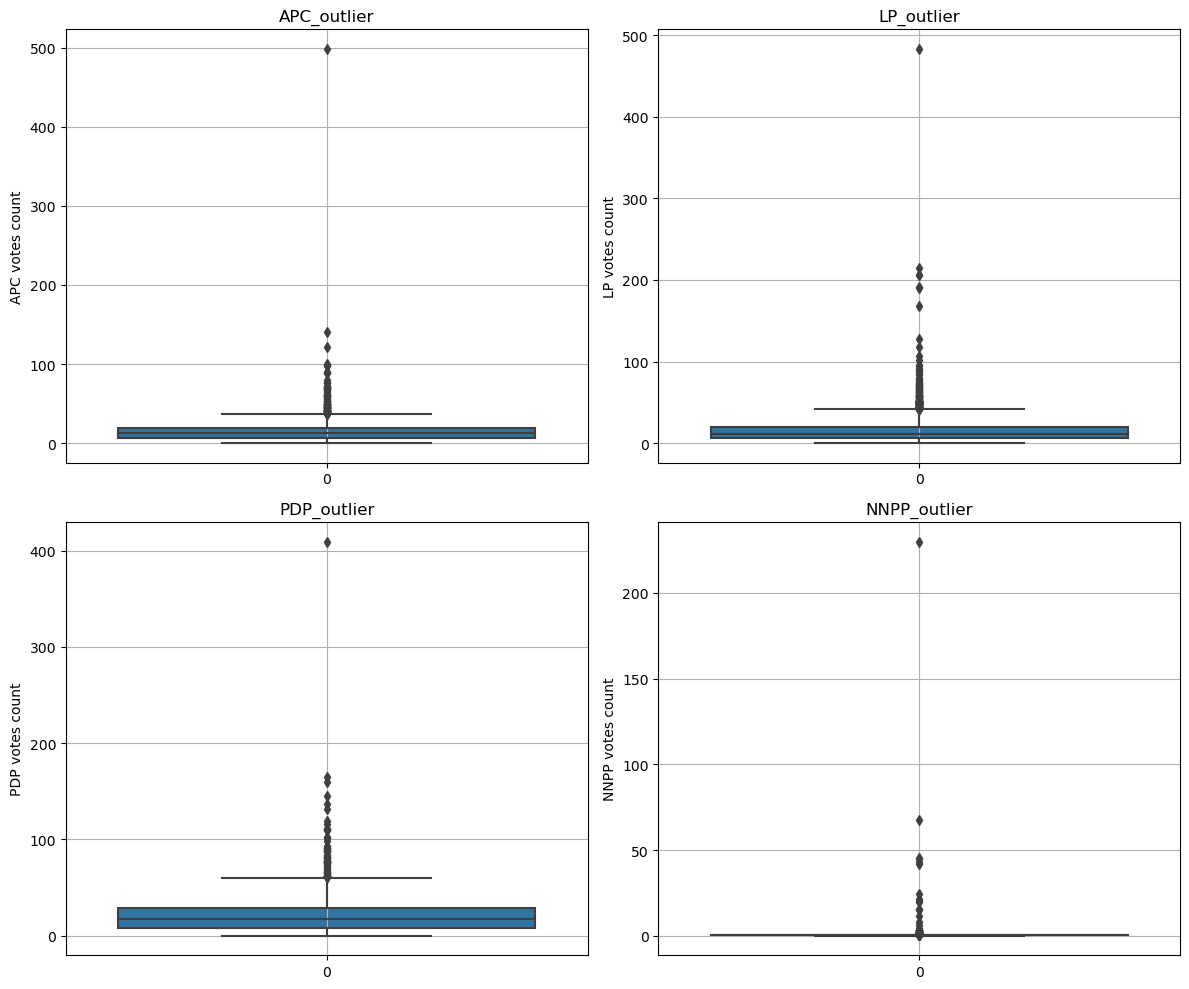

In [30]:
# Set up the matplotlib figure
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot each scatter plot
sns.boxplot(ax=axs[0, 0], data=outlier_scores['APC_outlier'])
axs[0, 0].set_title('APC_outlier')
axs[0,0].set_ylabel('APC votes count')
axs[0, 0].grid(True)

sns.boxplot(ax=axs[0, 1], data=outlier_scores['LP_outlier'])
axs[0, 1].set_title('LP_outlier')
axs[0,1].set_ylabel('LP votes count')
axs[0, 1].grid(True)

sns.boxplot(ax=axs[1, 0], data=outlier_scores['PDP_outlier'])
axs[1, 0].set_title('PDP_outlier')
axs[1,0].set_ylabel('PDP votes count')
axs[1, 0].grid(True)


sns.boxplot(ax=axs[1, 1], data=outlier_scores['NNPP_outlier'])
axs[1, 1].set_title('NNPP_outlier')
axs[1,1].set_ylabel('NNPP votes count')
axs[1, 1].grid(True)



# Adjust the layout
plt.tight_layout()

plt.savefig('election_outliers.png')

# Display the plots
plt.show()



## Sorting

Let's sort our dataset to know the top three outlier places

In [32]:
from IPython.display import display, HTML
#import contextily as ctx

In [33]:
out = outlier_scores.drop(columns=['Neighbour_polls'])

# Sort the dataset by the outlier scores for each party
sorted_apc = out.sort_values(by='APC_outlier', ascending=False).head(3)
sorted_lp = out.sort_values(by='LP_outlier', ascending=False).head(3)
sorted_pdp = out.sort_values(by='PDP_outlier', ascending=False).head(3)
sorted_nnpp = out.sort_values(by='NNPP_outlier', ascending=False).head(3)



# Display the DataFrames
print('\033[1m' + 'Top 3 APC Outliers:' + '\033[0m')
display(HTML(sorted_apc.to_html()))
display(HTML('<hr style="height:3px;border:none;color:#333;background-color:#333;" />'))  # Horizontal line separator

print('\033[1m' + 'Top 3 PDP Outliers:' + '\033[0m')
display(HTML(sorted_pdp.to_html()))
display(HTML('<hr style="height:3px;border:none;color:#333;background-color:#333;" />'))  # Horizontal line separator

print('\033[1m' + 'Top 3 LP Outliers:' + '\033[0m')
display(HTML(sorted_lp.to_html()))
display(HTML('<hr style="height:3px;border:none;color:#333;background-color:#333;" />'))  # Horizontal line separator

print('\033[1m' + 'Top 3 NNPC Outliers:' + '\033[0m')
display(HTML(sorted_pdp.to_html()))

Top 3 APC Outliers:


,PU-Name,Latitude,Longitude,APC_outlier,LP_outlier,PDP_outlier,NNPP_outlier
560,TENGELEKIRI TOWN SQUARE,4.532813,6.403743,498.123153,7.694581,131.118227,0.226601
945,AYAMA/EGBABIRI - SEC. SCH. HALL,5.159325,6.197122,140.776256,2.876712,8.630137,0.337900
951,OKOROWARE COMP. SQUARE,5.159325,6.197122,121.689498,2.876712,7.625571,0.337900


Top 3 PDP Outliers:


,PU-Name,Latitude,Longitude,APC_outlier,LP_outlier,PDP_outlier,NNPP_outlier
653,TOWN HALL - EMADIKE,4.690139,6.321278,14.941606,17.397810,409.405109,0.467153
393,ADIEBIRI TOWN HALL,5.091990,6.258837,17.706767,12.157895,164.609023,0.526316
1553,"STATE SCHOOL III, NEW SANGANA",4.307773,6.245560,8.533333,1.333333,160.040000,0.206667


Top 3 LP Outliers:


,PU-Name,Latitude,Longitude,APC_outlier,LP_outlier,PDP_outlier,NNPP_outlier
172,AGBOGIDI DUDU SQUARE,5.056279,5.781342,12.570513,483.147436,8.134615,229.923077
1414,FANWA TOWN HALL,4.951447,6.349197,2.898477,214.672589,11.170051,0.467005
1344,ERIGBE COMP. SQUARE,4.951447,6.349197,29.182741,206.652284,60.010152,0.535533


Top 3 NNPC Outliers:


,PU-Name,Latitude,Longitude,APC_outlier,LP_outlier,PDP_outlier,NNPP_outlier
653,TOWN HALL - EMADIKE,4.690139,6.321278,14.941606,17.397810,409.405109,0.467153
393,ADIEBIRI TOWN HALL,5.091990,6.258837,17.706767,12.157895,164.609023,0.526316
1553,"STATE SCHOOL III, NEW SANGANA",4.307773,6.245560,8.533333,1.333333,160.040000,0.206667
